<a href="https://colab.research.google.com/github/MarshaC713/NLP-Sentiment-Analysis-Project/blob/main/Marsha_Castello_NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NLP Sentiment Analysis in Python** 🌸

### Inthis project I will be conducting NLP Sentiment analysis in Python exploring the following different techniques:


**Techniques**
1.   VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2.   Roberta Pre-trained Model from 🤗 HuggingFace 
3.   🤗 HuggingFace Pipeline


- VADER  is the older, traditional approach, where as the Roberta Pre-trained Model is a more advanced transormer model and it will be interesting to explore and compare the results of these two different models. 
- **I** will then explore a 🤗 HuggingFace Pipeline.




###**Step 0: Read in Data and NLTK Basics** 📚
NLTK = Natural Language Tool Kit

In [108]:
# Import relevant Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
# Read in dat from csv file
df = pd.read_csv('/content/drive/MyDrive/Amazon Reviews/Reviews.csv')

**Exploratory Data Analysis(EDA)**  - Taking a closer look at the data

In [70]:
# calling up the data frame only returns a sample as the dataset is large

df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [71]:
# Calling up the head of the data - the first few rows, in this case 10
# Gives a more manageable glimpse of the data
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [72]:
# Calling up the tail of the data - the last few rows, in this case 10
# Gives us a comparison with the head to spot any early trends
df.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [73]:
# Calling up the dimensionality of the DataFrame to see how many rows and columns there are
# As we can see this is quite a large dataframe which means it will be excellent to perform analysis on
# as it should return relatively more representative results than a smaller datset would

print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  568454
Number of Columns:  10


In [74]:
# At this point it would be useful to get a summary of the data

# The summary provides info on the title, index and data type of each column
# Of particular interest for this project are the 'Score' and 'Text' columns 
# which give an indication of customer satisfaction levels in regard to the product

df.info() #brief summary of info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [75]:
#Looking at the text column in the first row, returns the following:
# The customer is highly satisfied with the product and finds it superior to similar offerings.
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [76]:
# Downscalling project

df = df.head(500)
print(df.shape)

(500, 10)


In [77]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [78]:
# Checking the frequency of each score (rating)

df['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

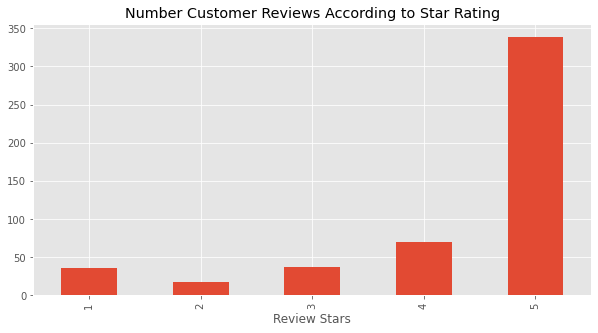

In [47]:
# Sorting the index and plotting a bar chart of the results,
# we can see that the most frequent scor out of a dataset of 500, is the top score of 5,
# so this is a high value product.

ax = df['Score'].value_counts().sort_index().plot(kind='bar', 
                                             title= 'Number Customer Reviews According to Star Rating', 
                                             figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show

**Basic NLTK**

In [79]:
# An example of a good review and therefore good/ positive sentiment
example = df['Text'][40]
print(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


In [80]:
# An example of a poor review and therefore bad/ negative sentiment
example2 = df['Text'][50]
print(example2)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [50]:
# Using NLTK to 'Tokenize' the sentences
# Starting with the good review

nltk.word_tokenize(example)

['The',
 'variety',
 'packs',
 'taste',
 'great',
 '!',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 'have',
 'them',
 'every',
 'morning',
 '.',
 'At',
 '$',
 '0.30',
 'cents',
 'per',
 'meal',
 ',',
 'I',
 'do',
 "n't",
 'understand',
 'why',
 'everyone',
 'on',
 'earth',
 'is',
 "n't",
 'buying',
 'this',
 'stuff',
 'up.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Maple',
 'and',
 'brown',
 'sugar',
 'is',
 'terrific',
 ',',
 'followed',
 'by',
 'apples',
 'and',
 'cinnamon',
 ',',
 'followed',
 'by',
 'regular',
 '.',
 'You',
 'do',
 "n't",
 'get',
 'tired',
 'of',
 'the',
 'same',
 'ole',
 'thing',
 ',',
 'and',
 'they',
 'taste',
 'great.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 'just',
 'boil',
 'water',
 'from',
 'a',
 'small',
 'pot',
 ',',
 'empty',
 'the',
 'packet',
 'or',
 '2',
 'in',
 'a',
 'bowl',
 ',',
 'pour',
 'in',
 'boiling',
 'water',
 ',',
 'and',
 'watch',
 'it',
 'expand',
 'to',
 '2x',
 'its',
 'size',
 '!',
 '<',
 'br',


In [22]:
# Using NLTK to 'Tokenize' the sentences
# Comparing  with the bad review

nltk.word_tokenize(example2)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [25]:
# Tokenizing splits the sentences down into its word components
# and in some cases splits the word, for example 'don't'. into 'do' and 'n't'
#Converting the words into a language the computer understands
tokens = nltk.word_tokenize(example2)
tokens[:10] # printing first 10 of tokens

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [51]:
# The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging (POS-tagging):

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In the above cell we have the token = the first word, and its part of speech code = group of letters its followed by.  So for the token 'This', its part of speech tag is 'DT' for example.

We can identify what each code means by using the NLTK library.  a snap shot is given below.  From this library we can see that  words/ tokens such as 'Th'. have a 'DT' Pos cotagging code which mean it's a 'Determiner'.   'Oatmeal'has a tag of 'NN'  which labels it as a 'Noun, singular, such as cat or tree'.

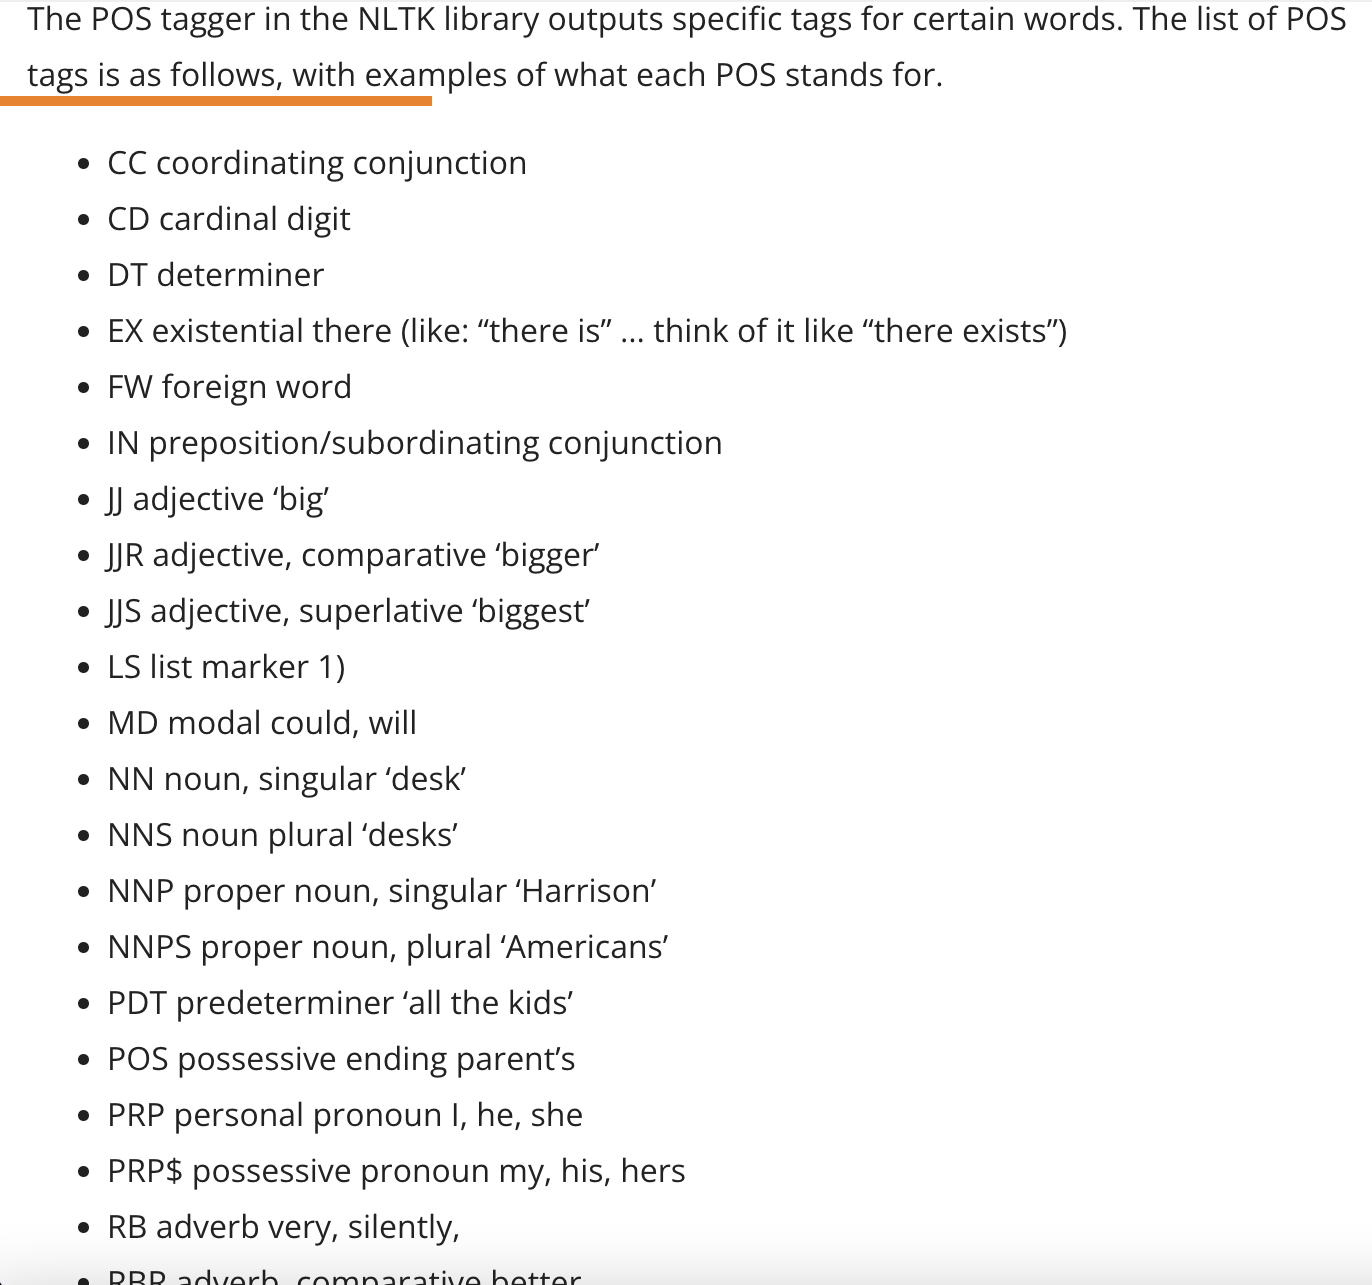

In [52]:
# Each of the values in our dataset has now been given its pos tag.
# The code below looks at the first 10 rows for clarity
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [81]:
# The next step. is to take these tagged parts of speech and put them into entities
# NLTKs entity chunker chunks the given list of tagged tokens, taking the tokens
# and grouping them into chumks of text as follows

import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words'

entities =  nltk.chunk.ne_chunk(tagged)

entities.pprint()


SyntaxError: ignored

### Step 1. VADER Sentiment Scoring

For this project I will now use NLTK's SentimentIntensityAnalyser to get the negative/ neautral and positive scores of the text
- This employs the 'bag of words' approach:
1. Stop words are removed
2. Each word is scored and combined into a total score

In other words the VADER (Valence Aware Dictionary and Sentiment Reasoner) will  take all the words in a statement, assign a positive/ neautral or negative score and give a statement an overall rating based on the rating with the highest frequency. So a statement with mostly negative words will receive an overall VADER Sentiment Score of negative,  and so on.

**Caveat:** This approach does not account for relationships between words which is extremely important in human speech to understand the nuance of whats being said. But it gives us a start

Stop words such as 'and' or 'the' are removed as they do not convey emotional sentiment.

In [82]:
# importing the relevant libraries and tools 
# and creating a SentimentIntensityAnalyzer and assigning it to the object 'sia'

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
# We can now test sia with a random phrase
# and analyse the sentiment score it gives on a scale of 0-1
# the score returns negative as 0, neutral as just above zero at 0.334
# and positive receives the highest score and is closest to 1 with a score of 0.666
# So in conclusion,  the score below is mostly positive.

# The compound score is an aggregate of all the scores.

sia.polarity_scores('I am so happy') 

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [84]:
# Testing our sia model with a negative statement:
# this returns a 0 positive score and mostly negative and neutral score, 
#skewed more towards negativity, with a negative compound score of -0.6

sia.polarity_scores('This is the worst day ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [85]:
# Now that we have tested that the sia is working correctly we can run it on 
# a sample from our data. So here I'm going back to the negative
# review about oatmeal:
# This returns a zero positive score, high neatral score, and some negativity scoring.
# The compound score is negative overall

print(example2)
sia.polarity_scores(example2) 



This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [88]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [97]:
# So now we can Run the polarity score will now be run on whole dataset
# loping through every text field in the dataframe and returning the polarity scores
# Executed below with a simple loop: 

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)
  

  0%|          | 0/500 [00:00<?, ?it/s]

In [98]:
# Printing a dictionary with each id either neg/ neu/pos

res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [99]:
# Sore dictionary into a dataframe as this
# will be easier to work with 

pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0550,0.0000,0.0560,0.1000,0.0000,0.0000,0.0590,0.0250,0.041,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.7040,0.7170,0.8550,0.6450,0.7880,0.5540,0.7990,0.7620,0.904,0.6780
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.2410,0.2830,0.0890,0.2540,0.2120,0.4460,0.1420,0.2120,0.055,0.3220
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9287,0.9367,0.5976,0.6486,0.9743,0.9725,0.7833,0.9848,0.128,0.9811


In [100]:
# The above is landscape and not orentated the way we would like
# so we can flip the orietation in the following manner,
# Now we have our variables of interest as coloumn headers

pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [101]:
# Resetting index and rename index as 'Id' so
# that we can do a left merge on
# our original dataset

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [102]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [103]:
# Now we have sentiment score and meta data

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### **Plot VADER Results**

Next we need to test if our model is in line with what we would expect,  going on the assumption that, a 1 star review will have more negative connotation than a 5 star review.  The star ranking gives an indication of the sentiment behind the review.


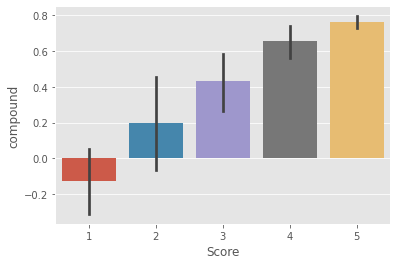

In [110]:
# We can do this by plotting a bar chart as below,
# barchat below returns exactly what we would expect,
# the compound score correlates with the sentiment of the text

sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

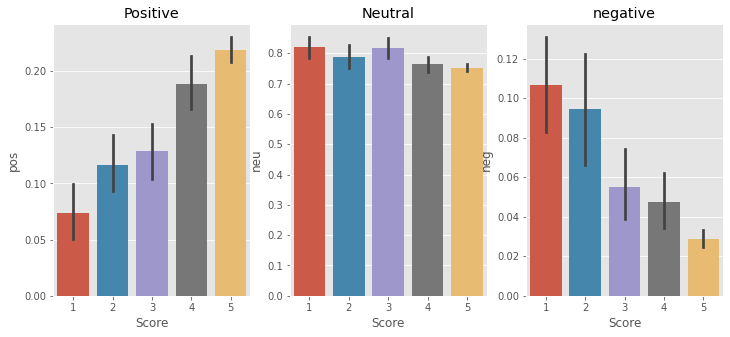

In [115]:
from matplotlib.gridspec import tight_layout
# We can break this down further by looking at the positive, negative and neautral scores,
# using matplotlib subplots

fig, axs =plt.subplots(1, 3, figsize=(12, 5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('negative')
plt.tight_layout
plt.show()

We can deduce from above visualisations, that positivity sentiment is higher  and negative sentiment is lower with higher positive scores (star ratings). The text/ comeent because less negative as the score becomes higher. Which confirms our predictions and confirms Vaders value and reliability between sentiment score of the text and the star rating/ score.

### **Step 3. Roberta Pretrained Model**
- use a model trained of a large corpus of data
- Transformer model accounts for the words but also the context related to other words.

The previous VADER model, only looked at each word in the statent and scored each word individually.  However, human language is nuanced and dependant on context. For example a negative statement could be sarcastic or related to other words that make it a positive statement.

Where VADER fails, Roberta triumphs as this model is able to pick up on context, unlike VADER.

In [150]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [151]:

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [153]:
# Pulling down the model weights of a pretrained model
# this is called transfer learning.  This model was trained on
# a sample of twitter comments that were labeled accordingly

task ='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [155]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [161]:
#Polarity scores from the VADER model for comparison
print(example)
sia.polarity_scores(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [160]:
# Using Roberta model
# first, encode the text into a format our
# model will understand
# the out generates 3 diferent scores, negative, neutral and positive respectives.

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores


array([0.00969057, 0.03783322, 0.95247626], dtype=float32)

In [162]:
# storing scores into a dictionary
# We can see clearly that Roberta model is able to give
# much higher and therefore definitive scores for our data
# than the VADER model

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.009690567, 'roberta_neu': 0.037833218, 'roberta_pos': 0.95247626}


In [163]:
# Now we are ready to run the Roberta model on the enire dataset, 
# as we did before with the VADER model by making a function out of the previous code:

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [164]:
# Now I will iterate over the dataset as, done previously in the VADER model
# using 'try' allows model to continue past where model breaks because it cannot translate the text
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [165]:
vader_result


{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9811}

In [166]:
roberta_result

{'roberta_neg': 0.0024397597,
 'roberta_neu': 0.011327237,
 'roberta_pos': 0.986233}

In [167]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397597,
 'roberta_neu': 0.011327237,
 'roberta_pos': 0.986233}

In [168]:
# Combining both VADER and Roberta scores onto one
# Dataframe using a left merge:

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [170]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Compare Scores between models

In [171]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### **Step 3. Combine and compare**

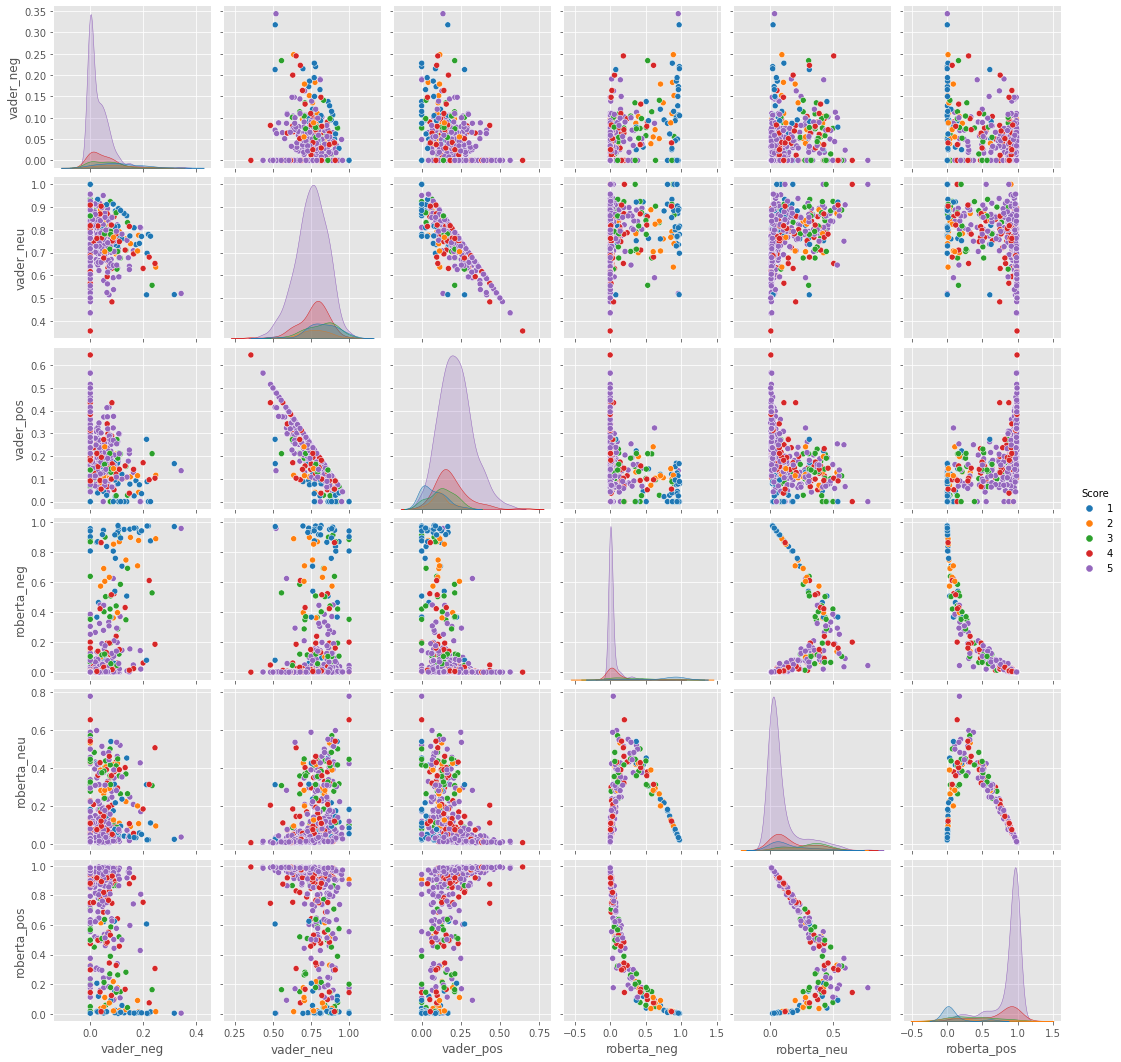

In [172]:
## Comparing scores between models
# using Seaborns pair plot which 
# shows comparison between each observation and each feature

# The 5 star reviews are in purple. In the VADER model 
# the positive reviews have a slight tendency to the right,
# Where as the Roberta model is more confident in its predictions 
#with the positive moving much further to the right, and all categories of 
# sentiment being define,  much more distinctly.

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

### Step 4: Review Examples:
putting the Roberta models ability to identify context to the text by looking at examples where the model scoring and review score differ the most. For example: Positive 1-Star and Negative 5-Star Reviews

In [173]:
# Querying where there is a review with low score// star rating of 1
# and sort the values by the Roberta positive score
# displaying the highest positivity score, and print out the text.
# We can see the sentence below is very nuanced as starts of sounding positive.
# the Roberta model is still able to detect that this is a negative review.

results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [174]:
# Doing the same for the VADER model we see that the VADER model
# is not able to pick up on the sarcasm of this bad review 
# and labels it positive

results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [175]:
# negative 5 star review with Roberta Model
# negative sentiment, but positive review 

results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [176]:
# negative 5 star review with VADER Model
# negative sentiment, but positive review.
# The VADER model picked the same review, so shows both
#models were confused by the negative sentiment but positive review

results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## The Transformers Pipeline 🤗
A Quick & easy way to run sentiment predictions, by using the Hugging Face Transformers pipeline, which provides APIs and tools to easily download and train state-of-the-art pretrained models. This enables you to run sentiment analysis quickly with just a few lines of code, as below.

In [177]:


from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [178]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [181]:
sent_pipeline('Make sure to dance in the rain!')

[{'label': 'POSITIVE', 'score': 0.9998238682746887}]

In [180]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [182]:
sent_pipeline('The sun is shining')

[{'label': 'POSITIVE', 'score': 0.9998611211776733}]

In [183]:
sent_pipeline('Its raining heavily')

[{'label': 'NEGATIVE', 'score': 0.9715127944946289}]

In [184]:
sent_pipeline('It\'s a new year!')

[{'label': 'POSITIVE', 'score': 0.9998488426208496}]

In [185]:
sent_pipeline('I have a cold')

[{'label': 'NEGATIVE', 'score': 0.9996151924133301}]

In [186]:
sent_pipeline('Marvel movies trump DC')

[{'label': 'POSITIVE', 'score': 0.9552395343780518}]

In [187]:
sent_pipeline('I enjoyed this project')

[{'label': 'POSITIVE', 'score': 0.9998738765716553}]

### By Marsha Castello 